In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [2]:
data = pd.read_csv('df_Normal_NAFLD_NASH_after_data_cleaning.csv', index_col = 0)
data

,TSPAN6,TNMD,DPM1,SCYL3,FIRRM,FGR,CFH,FUCA2,GCLC,NFYA,...,EXOC3L2,CIROP,MYOCOS,PRR33,SLURP2,MSANTD7,C1orf202,C2orf81,PERCC1,patients
Normal_1,1.002603,0.105745,0.383261,-0.920582,0.268735,-0.343447,-0.874803,0.378011,-0.441259,-0.860958,...,-1.044097,-0.150756,4.534414,-0.206955,6.633250,-0.999095,-0.150756,-0.872882,-0.273928,0
Normal_2,0.271746,-0.348909,0.580008,0.656446,0.438396,-1.134655,0.089608,-0.771966,0.804378,0.675793,...,-0.603927,-0.150756,-0.348264,-0.206955,-0.150756,-0.598472,-0.150756,-0.024544,2.957486,0
Normal_3,1.412618,-0.575680,0.569164,0.955702,-1.036152,-0.885377,-1.450220,1.087337,-0.658843,-0.670913,...,-1.279713,-0.150756,-0.348264,-0.206955,-0.150756,-1.478128,-0.150756,2.797628,-0.273928,0
Normal_4,0.334716,-0.074388,-0.056578,-0.065486,0.210492,-0.981946,0.269706,-0.627430,-0.293378,0.257369,...,-1.082922,-0.150756,-0.348264,-0.206955,-0.150756,-1.478128,-0.150756,-0.872882,-0.273928,0
Normal_5,0.673925,-0.575680,0.605453,-0.830054,0.864055,-0.984175,0.705858,0.758058,0.203001,-0.599397,...,-1.651497,-0.150756,2.315908,-0.206955,-0.150756,-0.050656,-0.150756,-0.872882,-0.273928,0
Normal_6,-0.243355,-0.575680,-1.640560,-1.289074,3.067248,1.787625,0.568683,-1.363243,-0.688915,0.674412,...,-0.581794,-0.150756,-0.348264,-0.206955,-0.150756,1.409028,-0.150756,-0.872882,-0.273928,0
Normal_7,-0.248897,-0.575680,-1.283491,0.955697,-0.540762,-0.079968,-1.706929,-1.724207,-1.598190,-0.656607,...,-1.453321,-0.150756,-0.348264,-0.206955,-0.150756,-0.451368,-0.150756,1.019923,-0.273928,0
Normal_8,1.695036,-0.575680,0.792999,0.122269,-0.181599,-0.797052,0.598585,0.562550,-0.336148,-0.313100,...,-0.979422,-0.150756,-0.348264,-0.206955,-0.150756,0.809516,-0.150756,1.838009,-0.273928,0
Normal_9,3.154405,-0.575680,2.202051,1.346908,0.454999,-0.489931,1.562099,3.544173,2.499026,1.494564,...,-1.503550,-0.150756,-0.348264,-0.206955,-0.150756,0.970814,-0.150756,0.204086,-0.273928,0
Normal_10,0.590617,-0.575680,0.847918,-0.320246,1.598592,1.767242,0.069969,0.377041,-0.219174,0.224897,...,-0.945860,-0.150756,-0.348264,-0.206955,-0.150756,-0.259446,-0.150756,1.368294,1.408708,0


In [3]:
patient_num = data['patients']
patient_num_array = patient_num.values
patient_num_array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2])

In [4]:
df_train = data.iloc[:, :-1]
df_label = data["patients"]

In [5]:
import tensorflow as tf
import keras
from keras import regularizers
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import BatchNormalization, Input, Lambda
from keras.models import load_model

2024-06-27 17:02:22.881916: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [6]:
def corre_plot_AE(AE_df_train, X_train_pred):
    x = np.linspace(-2,10)
    y = x
    plt.figure(constrained_layout=True)
    plt.title('train correlation')
    plt.scatter(AE_df_train, X_train_pred, alpha=0.02, s=1)
    plt.plot(x,y,color='green', linestyle = '--')

In [7]:
def correlation_coefficient(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sqrt(np.sum((x - x_mean) ** 2) * np.sum((y - y_mean) ** 2))
    return numerator / denominator

In [8]:
model = load_model("N_NAFLD_NASH_model1_adamax_20dims_linear_liver_data.h5")
model.summary()

2024-06-27 17:02:25.332438: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-06-27 17:02:25.333551: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2024-06-27 17:02:25.403534: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-06-27 17:02:25.404338: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:04:00.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2024-06-27 17:02:25.404417: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2000)              34504000  
_________________________________________________________________
batch_normalization (BatchNo (None, 2000)              8000      
_________________________________________________________________
dense_1 (Dense)              (None, 200)               400200    
_________________________________________________________________
batch_normalization_1 (Batch (None, 200)               800       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                4020      
_________________________________________________________________
batch_normalization_2 (Batch (None, 20)                80        
_________________________________________________________________
dense_3 (Dense)              (None, 200)               4

2024-06-27 17:02:29.897915: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2024-06-27 17:02:29.910587: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3491560000 Hz
2024-06-27 17:02:30.075104: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


2/2 [==============================] - 0s 19ms/step


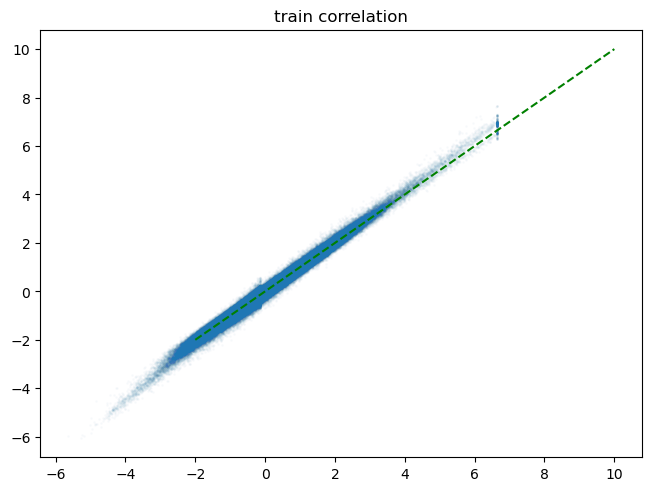

In [9]:
X_train_pred = model.predict(df_train, verbose = 1)
corre_plot_AE(df_train, X_train_pred)

In [10]:
print(correlation_coefficient(df_train.values, X_train_pred))

0.9928795027851474


In [11]:
# extract latent layer (dense_2)
layer_name = 'dense_2'
latent_layer = Model(inputs = model.input, outputs = model.get_layer(layer_name).output)

In [12]:
latent_layer_pred_train = latent_layer.predict(df_train, verbose=1)
latent_layer_pred_train.shape

2/2 [==============================] - 0s 8ms/step


(45, 20)

In [13]:
df_20dims = pd.DataFrame(latent_layer_pred_train)
df_20dims

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.610137,0.375561,0.637703,0.239823,-0.530389,-0.625302,-0.871785,-0.466470,0.474829,0.658002,0.819238,0.539265,0.205614,0.735314,0.384105,0.468035,-0.283226,-0.688932,-0.844493,0.330908
1,-0.342620,-0.225645,-0.686375,-0.680175,-0.626575,-0.600946,0.639591,0.079401,0.486922,0.384131,0.573299,0.412847,0.790353,0.807222,-0.677759,-0.515003,0.786884,-0.558459,-0.613927,-0.255659
2,0.871033,0.572958,0.437904,-0.699827,0.206688,-0.479854,0.832330,-0.827721,0.392316,-0.313739,0.303701,0.620427,0.856593,-0.404629,0.717632,-0.648131,0.793715,-0.836082,-0.838507,0.672721
3,0.319736,-0.263178,0.657590,0.351068,0.822744,-0.574848,0.262535,0.625524,-0.102897,0.512514,1.030100,0.403488,-0.441707,0.843763,0.047407,-0.576454,0.336294,-0.746262,-0.635470,0.563222
4,0.393023,-0.482499,-0.650966,-0.430461,-0.443499,-0.239558,0.825828,0.544155,0.622848,0.710912,-0.072239,0.234417,0.380876,0.530615,0.816398,-0.632772,-0.481559,-0.612103,-0.696463,-0.201834
5,0.656357,-0.203536,0.692136,-0.516257,-0.708102,-0.447541,0.672163,0.476129,0.459653,0.581071,0.336156,-0.860024,-0.311829,0.842291,0.288417,0.436432,-0.521977,-0.474798,-0.281992,0.578518
6,-0.546966,0.354119,0.872639,-0.539774,0.330325,-0.481698,0.394242,-0.735237,1.076263,0.859758,-0.101278,0.405506,-0.403444,0.641404,0.806933,-0.684070,0.380116,-0.648378,-0.511759,0.418071
7,0.478985,0.669081,-0.247657,-0.178275,0.602342,-0.551517,0.618451,0.847273,0.567640,0.632309,0.468871,-0.275923,1.008851,-0.139068,0.500610,-0.693298,-0.647040,-0.576471,0.406284,-0.108382
8,0.686238,0.011442,-0.671509,-0.588330,1.003495,0.738706,1.067929,0.515579,-1.324934,0.610509,0.837317,-0.959934,1.014247,0.745735,0.794598,0.262942,-0.736791,0.416616,-1.103911,-0.355893
9,-0.625413,0.506888,-0.288974,-0.527638,-0.623428,0.267466,0.866794,-0.799042,0.037956,0.714109,0.125954,-0.737999,0.611284,-0.015788,-0.620943,0.545528,0.458669,-0.680427,-0.622898,0.578539


In [14]:
df_20dims_patients = df_20dims.copy()
df_20dims_patients['patient number'] = patient_num_array
df_20dims_patients

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,patient number
0,0.610137,0.375561,0.637703,0.239823,-0.530389,-0.625302,-0.871785,-0.466470,0.474829,0.658002,...,0.539265,0.205614,0.735314,0.384105,0.468035,-0.283226,-0.688932,-0.844493,0.330908,0
1,-0.342620,-0.225645,-0.686375,-0.680175,-0.626575,-0.600946,0.639591,0.079401,0.486922,0.384131,...,0.412847,0.790353,0.807222,-0.677759,-0.515003,0.786884,-0.558459,-0.613927,-0.255659,0
2,0.871033,0.572958,0.437904,-0.699827,0.206688,-0.479854,0.832330,-0.827721,0.392316,-0.313739,...,0.620427,0.856593,-0.404629,0.717632,-0.648131,0.793715,-0.836082,-0.838507,0.672721,0
3,0.319736,-0.263178,0.657590,0.351068,0.822744,-0.574848,0.262535,0.625524,-0.102897,0.512514,...,0.403488,-0.441707,0.843763,0.047407,-0.576454,0.336294,-0.746262,-0.635470,0.563222,0
4,0.393023,-0.482499,-0.650966,-0.430461,-0.443499,-0.239558,0.825828,0.544155,0.622848,0.710912,...,0.234417,0.380876,0.530615,0.816398,-0.632772,-0.481559,-0.612103,-0.696463,-0.201834,0
5,0.656357,-0.203536,0.692136,-0.516257,-0.708102,-0.447541,0.672163,0.476129,0.459653,0.581071,...,-0.860024,-0.311829,0.842291,0.288417,0.436432,-0.521977,-0.474798,-0.281992,0.578518,0
6,-0.546966,0.354119,0.872639,-0.539774,0.330325,-0.481698,0.394242,-0.735237,1.076263,0.859758,...,0.405506,-0.403444,0.641404,0.806933,-0.684070,0.380116,-0.648378,-0.511759,0.418071,0
7,0.478985,0.669081,-0.247657,-0.178275,0.602342,-0.551517,0.618451,0.847273,0.567640,0.632309,...,-0.275923,1.008851,-0.139068,0.500610,-0.693298,-0.647040,-0.576471,0.406284,-0.108382,0
8,0.686238,0.011442,-0.671509,-0.588330,1.003495,0.738706,1.067929,0.515579,-1.324934,0.610509,...,-0.959934,1.014247,0.745735,0.794598,0.262942,-0.736791,0.416616,-1.103911,-0.355893,0
9,-0.625413,0.506888,-0.288974,-0.527638,-0.623428,0.267466,0.866794,-0.799042,0.037956,0.714109,...,-0.737999,0.611284,-0.015788,-0.620943,0.545528,0.458669,-0.680427,-0.622898,0.578539,0


In [15]:
col_list = ['column' + str(i) for i in range(1, 21)]
col_list.append('patient number')

In [16]:
# name columns
df_20dims_patients.columns = col_list

In [17]:
df_20dims_patients

,column1,column2,column3,column4,column5,column6,column7,column8,column9,column10,...,column12,column13,column14,column15,column16,column17,column18,column19,column20,patient number
0,0.610137,0.375561,0.637703,0.239823,-0.530389,-0.625302,-0.871785,-0.466470,0.474829,0.658002,...,0.539265,0.205614,0.735314,0.384105,0.468035,-0.283226,-0.688932,-0.844493,0.330908,0
1,-0.342620,-0.225645,-0.686375,-0.680175,-0.626575,-0.600946,0.639591,0.079401,0.486922,0.384131,...,0.412847,0.790353,0.807222,-0.677759,-0.515003,0.786884,-0.558459,-0.613927,-0.255659,0
2,0.871033,0.572958,0.437904,-0.699827,0.206688,-0.479854,0.832330,-0.827721,0.392316,-0.313739,...,0.620427,0.856593,-0.404629,0.717632,-0.648131,0.793715,-0.836082,-0.838507,0.672721,0
3,0.319736,-0.263178,0.657590,0.351068,0.822744,-0.574848,0.262535,0.625524,-0.102897,0.512514,...,0.403488,-0.441707,0.843763,0.047407,-0.576454,0.336294,-0.746262,-0.635470,0.563222,0
4,0.393023,-0.482499,-0.650966,-0.430461,-0.443499,-0.239558,0.825828,0.544155,0.622848,0.710912,...,0.234417,0.380876,0.530615,0.816398,-0.632772,-0.481559,-0.612103,-0.696463,-0.201834,0
5,0.656357,-0.203536,0.692136,-0.516257,-0.708102,-0.447541,0.672163,0.476129,0.459653,0.581071,...,-0.860024,-0.311829,0.842291,0.288417,0.436432,-0.521977,-0.474798,-0.281992,0.578518,0
6,-0.546966,0.354119,0.872639,-0.539774,0.330325,-0.481698,0.394242,-0.735237,1.076263,0.859758,...,0.405506,-0.403444,0.641404,0.806933,-0.684070,0.380116,-0.648378,-0.511759,0.418071,0
7,0.478985,0.669081,-0.247657,-0.178275,0.602342,-0.551517,0.618451,0.847273,0.567640,0.632309,...,-0.275923,1.008851,-0.139068,0.500610,-0.693298,-0.647040,-0.576471,0.406284,-0.108382,0
8,0.686238,0.011442,-0.671509,-0.588330,1.003495,0.738706,1.067929,0.515579,-1.324934,0.610509,...,-0.959934,1.014247,0.745735,0.794598,0.262942,-0.736791,0.416616,-1.103911,-0.355893,0
9,-0.625413,0.506888,-0.288974,-0.527638,-0.623428,0.267466,0.866794,-0.799042,0.037956,0.714109,...,-0.737999,0.611284,-0.015788,-0.620943,0.545528,0.458669,-0.680427,-0.622898,0.578539,0


In [18]:
df_20dims_patients.to_csv('latent_df_20dims_N_NAFL_NASH.csv', index=False)

In [19]:
#importing library
import optuna
import warnings
warnings.filterwarnings('ignore')
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

In [20]:
# data split
# data split and standardalization
x_gbm_ori = df_20dims_patients.drop('patient number', axis = 1).values
y_gbm = df_20dims_patients['patient number'].values
x_gbm = x_gbm_ori.copy()
sc = StandardScaler()
sc.fit(x_gbm)
x_gbm = sc.transform(x_gbm)

In [29]:
# parameters optimization using optuna
def objective(trial):
    # Set LightGBM hyperparameters using Optuna
    param = {
        'objective': 'multiclass',
        'metric': 'multi_logloss',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'num_class': 3,
        'num_iteration': 3000,
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
    }

    # Set 10-fold cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state = 2022)

    # List to save cross-validation results
    cv_results = []

    # Train and evaluate the model for each fold
    for train_idx, valid_idx in cv.split(x_gbm, y_gbm):
        X_train, X_valid = x_gbm[train_idx], x_gbm[valid_idx]
        y_train, y_valid = y_gbm[train_idx], y_gbm[valid_idx]
        
        lgb_train = lgb.Dataset(X_train, label = y_train)
        lgb_valid = lgb.Dataset(X_valid, label = y_valid, reference = lgb_train)
        
        gbm = lgb.train(param,
                        lgb_train,
                        valid_sets = [lgb_train, lgb_valid],
                        early_stopping_rounds = 100,
                        verbose_eval = False)
        y_pred = gbm.predict(X_valid, num_iteration=gbm.best_iteration)
        y_pred_max = np.argmax(y_pred, axis=1)
        cv_results.append(accuracy_score(y_valid, y_pred_max))

    # Return the minimum accuracy from cross-validation
    return np.min(cv_results)

# Create an Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Output the best hyperparameters
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))

print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

[I 2024-05-31 21:28:53,585] A new study created in memory with name: no-name-d6c36f56-c842-44f4-8802-0fb6e06035cd
[I 2024-05-31 21:28:54,456] Trial 0 finished with value: 0.2222222222222222 and parameters: {'lambda_l1': 0.0015158603161974612, 'lambda_l2': 1.9865260703753535e-08, 'num_leaves': 82, 'feature_fraction': 0.6388696812326158, 'bagging_fraction': 0.7124559635334766, 'bagging_freq': 4, 'min_child_samples': 95, 'learning_rate': 0.042363685287791886}. Best is trial 0 with value: 0.2222222222222222.
[I 2024-05-31 21:28:54,685] Trial 1 finished with value: 0.2222222222222222 and parameters: {'lambda_l1': 0.003058255932370442, 'lambda_l2': 4.787658884022425e-05, 'num_leaves': 199, 'feature_fraction': 0.811464719096815, 'bagging_fraction': 0.8595953890596193, 'bagging_freq': 4, 'min_child_samples': 75, 'learning_rate': 0.06801498542918315}. Best is trial 0 with value: 0.2222222222222222.
[I 2024-05-31 21:28:55,104] Trial 2 finished with value: 0.2222222222222222 and parameters: {'lam

Best trial:
  Value: 0.5555555555555556
  Params: 
    lambda_l1: 7.644314103897697e-07
    lambda_l2: 7.293894747487947e-08
    num_leaves: 49
    feature_fraction: 0.560543323591637
    bagging_fraction: 0.81724281492912
    bagging_freq: 4
    min_child_samples: 8
    learning_rate: 0.003967819096387769


In [30]:
# setting loss function for constructing SFC
from typing import Optional, List, Tuple

# multiclass_log_loss for LGBM

class MultiLoglossForLGBM:

    
    def __init__(self, n_class: int=3, use_softmax: bool=True, epsilon: float=1e-32) -> None:
        # initialize        
        self.name = "my_multiclass_logloss"
        self.n_class = n_class
        self.prob_func = self._get_prob_value if use_softmax else lambda x: x
        self.epsilon = epsilon
    
    def __call__(self, preds: np.ndarray, labels: np.ndarray, weight: Optional[np.ndarray]=None) -> float:
        #calculate loss function
        #get prob value by softmax
        prob = self.prob_func(preds)           # <= from logits to probability
        #convert labels to 1-hot
        labels = self._get_1hot_label(labels)  # <= labels (1D-array) to 1hot
        loss_by_sample = np.sum(- np.log(prob) * labels, axis=1)
        loss = np.average(loss_by_sample, weight)
        
        return loss
    
    def _calc_grad_and_hess(
        self, preds: np.ndarray, labels: np.ndarray, weight: Optional[np.ndarray]=None
    ) -> Tuple[np.ndarray]:
        """Calc Grad and Hess"""
        # # get prob value by softmax
        prob = self.prob_func(preds)           
        # # convert labels to 1-hot
        labels = self._get_1hot_label(labels)  # <= labels (1D-array) to 1hot label

        grad = prob - labels
        hess = prob * (1 - prob)        
        if weight is not None:
            grad = grad * weight[:, None]
            hess = hess * weight[:, None]
        return grad, hess
    
    def return_loss(self, preds: np.ndarray, data: lgb.Dataset) -> Tuple[str, float, bool]:
        """Return Loss for lightgbm"""
        labels = data.get_label()
        weight = data.get_weight()
        n_example = len(labels)
        
        # # reshape preds: (n_class * n_example,) => (n_class, n_example) =>  (n_example, n_class)
        preds = preds.reshape(self.n_class, n_example).T  # <= preds (1D-array) to 2D-array 
        # # calc loss
        loss = self(preds, labels, weight)
        
        return self.name, loss, False
    
    def return_grad_and_hess(self, preds: np.ndarray, data: lgb.Dataset) -> Tuple[np.ndarray]:
        """Return Grad and Hess for lightgbm"""
        labels = data.get_label()
        weight = data.get_weight()
        n_example = len(labels)
        
        # # reshape preds: (n_class * n_example,) => (n_class, n_example) =>  (n_example, n_class)
        preds = preds.reshape(self.n_class, n_example).T  # <= preds (1D-array) to 2D-array 
        # # calc grad and hess.
        grad, hess =  self._calc_grad_and_hess(preds, labels, weight)

        # # reshape grad, hess: (n_example, n_class) => (n_class, n_example) => (n_class * n_example,) 
        grad = grad.T.reshape(n_example * self.n_class)   # <= return 1D-array 
        hess = hess.T.reshape(n_example * self.n_class)   # <= return 1D-array 
        
        return grad, hess
    
    def softmax(x):
        return np.exp(x)/np.sum(np.exp(x))
    
    def _get_prob_value(self, preds: np.ndarray) -> np.ndarray:
        """Convert Margin(Logit) to Prob by Softmax."""
        upper = np.exp(preds)
        prob = upper / np.sum(upper, axis=1, keepdims=True)
        prob = np.clip(prob, self.epsilon, 1 - self.epsilon)
        
        return prob
    
    
    
    def _get_1hot_label(self, labels: np.ndarray) -> np.ndarray:
        """Convert labels to 1hot array."""
        n_example = len(labels)
        #make a matrix here
        onehot = np.zeros((n_example, self.n_class))
        # setting overlap
        original_array=np.array([[0.95, 0.05, 0],
                                 [0.05, 0.90, 0.05],
                                 [0, 0.05, 0.95]])
        for index, j in enumerate(labels):
            if j==0:
                onehot[index]=original_array[0]
            elif j==1:
                onehot[index]=original_array[1]
            else:
                onehot[index]=original_array[2]
        
        return onehot

In [31]:
def plot_feature_importance(df): 
    n_features = len(df)
    df_plot = df.sort_values('importance')
    f_importance_plot = df_plot['importance'].values
    plt.barh(range(n_features), f_importance_plot, align='center')
    cols_plot = df_plot['feature'].values             
    plt.yticks(np.arange(n_features), cols_plot)      
    plt.xlabel('Feature importance')                  
    plt.ylabel('Feature') 

-------------------- 0 --------------------
(36, 20) (36,)
(9, 20) (9,)


-------------------- normal model learning -------------------- 

[LightGBM] [Warning] Unknown parameter: importance_type
[1]	train's multi_logloss: 1.09287	valid's multi_logloss: 1.10019
Training until validation scores don't improve for 100 rounds
[2]	train's multi_logloss: 1.08949	valid's multi_logloss: 1.10042
[3]	train's multi_logloss: 1.08662	valid's multi_logloss: 1.09882
[4]	train's multi_logloss: 1.08411	valid's multi_logloss: 1.09746
[5]	train's multi_logloss: 1.08101	valid's multi_logloss: 1.09765
[6]	train's multi_logloss: 1.0777	valid's multi_logloss: 1.0963
[7]	train's multi_logloss: 1.07419	valid's multi_logloss: 1.09573
[8]	train's multi_logloss: 1.07108	valid's multi_logloss: 1.09624
[9]	train's multi_logloss: 1.06769	valid's multi_logloss: 1.09629
[10]	train's multi_logloss: 1.06389	valid's multi_logloss: 1.09616
[11]	train's multi_logloss: 1.06021	valid's multi_logloss: 1.09626
[12]	train's mul

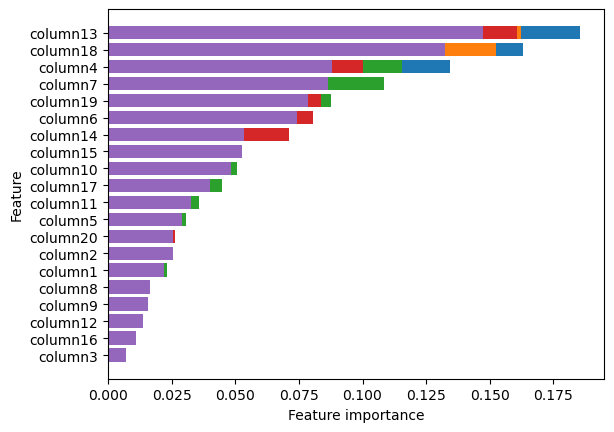

In [32]:
# cross validation in normal model 
best_params = trial.params
best_params.update({
    'objective': 'multiclass',
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',
    'num_class': 3,
    'num_iteration': 3000,
    'verbosity': -1,
    'early_stopping_rounds': 100,
    'importance_type': 'gain',
    'seed': 42
})

# params in modified model
best_params_mm = trial.params.copy()
best_params_mm.update({
    'objective': 'multiclass',
    'metric': 'none',
    'boosting_type': 'gbdt',
    'num_class': 3,
    'num_iteration': 3000,
    'verbosity': -1,
    'early_stopping_rounds': 100,
    'seed': 42
})



# divide dataset
n_splits = 5
cv = list(StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 2022).split(x_gbm, y_gbm))

# CV loop
for nfold, (train_index, valid_index) in enumerate(cv):
    print("-"*20, nfold, "-"*20)
    x_tr, y_tr = x_gbm[train_index], y_gbm[train_index]
    x_va, y_va = x_gbm[valid_index], y_gbm[valid_index]
    print(x_tr.shape, y_tr.shape)
    print(x_va.shape, y_va.shape)
    
    # define lgb dataset
    lgb_train = lgb.Dataset(x_tr, label = y_tr)
    lgb_eval = lgb.Dataset(x_va, label = y_va, reference = lgb_train)
    
    print("\n")
    print("-"*20, "normal model learning", "-"*20, "\n")
    
    
    # model training
    evaluation_results={}
    model_DSM = lgb.train(best_params,
                      train_set=lgb_train,
                      valid_names=['train', 'valid'],
                      valid_sets=[lgb_train, lgb_eval],
                      evals_result=evaluation_results,
                      early_stopping_rounds = 100
                     )
    
    # calculate accuracy of test data
    y_pred_prob = model_DSM.predict(x_va, num_iteration = model_DSM.best_iteration)
    y_pred_lgb = np.argmax(y_pred_prob,axis=1)
    acc_lgb = accuracy_score(y_va, y_pred_lgb)
    print("-"*20, "Test data accuracy", "-"*20, "\n")
    print(acc_lgb)
    
    # gain features in normal LightGBM
    cols = list(df_20dims_patients.drop('patient number', axis = 1).columns)
    f_importance = np.array(model_DSM.feature_importance(importance_type='gain'))
    f_importance = f_importance / np.sum(f_importance)
    df_importance = pd.DataFrame({'feature':cols, 'importance':f_importance})
    df_importance = df_importance.sort_values('importance', ascending=False)
    print("-"*20, "gain importance in DSM", "-"*20, "\n")
    print(df_importance)
    
    # model training
    print("\n")
    print("-"*20, "DAM model learning", "-"*20, "\n")
    evaluation_results2={}
    my_mlnloss = MultiLoglossForLGBM(n_class = 3, use_softmax = True)
    model_myloss_DAM = lgb.train(best_params_mm,
                                train_set=lgb_train,
                                valid_names=['train', 'valid'],
                                valid_sets=[lgb_train, lgb_eval],
                                evals_result=evaluation_results2,
                                fobj=my_mlnloss.return_grad_and_hess,
                                feval=lambda preds, data: my_mlnloss.return_loss(preds, data),
                                early_stopping_rounds = 100
                               )
    
    # calculate accuracy of test data
    y_pred_prob_mm = model_myloss_DAM.predict(x_va, num_iteration = model_myloss_DAM.best_iteration)
    y_pred_lgb_mm = np.argmax(y_pred_prob_mm,axis=1)
    acc_lgb_mm = accuracy_score(y_va, y_pred_lgb_mm)
    print("-"*20, "Test data accuracy", "-"*20, "\n")
    print(acc_lgb_mm)
    
    print("-"*20, "gain importance in DSM", "-"*20, "\n")
    print(df_importance)
    
    # gain features in modified LightGBM
    cols = list(df_20dims_patients.drop('patient number', axis = 1).columns)
    f_importance_myloss = np.array(model_myloss_DAM.feature_importance(importance_type='gain'))
    f_importance_myloss = f_importance_myloss / np.sum(f_importance_myloss)
    df_importance_myloss = pd.DataFrame({'feature':cols, 'importance':f_importance_myloss})
    df_importance_myloss = df_importance_myloss.sort_values('importance', ascending=False)
    print(df_importance_myloss)
    print(plot_feature_importance(df_importance_myloss))
    
    # calculate differences between DSM(GC) and DAM(SFC)
    f_importance_ab = np.array(model_DSM.feature_importance(importance_type='gain'))
    f_importance_ab = f_importance_ab / np.sum(f_importance_ab)
    f_importance_myloss_ab = np.array(model_myloss_DAM.feature_importance(importance_type='gain'))
    f_importance_myloss_ab = f_importance_myloss_ab / np.sum(f_importance_myloss_ab)
    # after - before gain
    df_importance_subtracted = f_importance_myloss_ab - f_importance_ab
    df_importance_subtracted = df_importance_subtracted / np.sum(np.abs(df_importance_subtracted))
    df_importance_subtracted = pd.DataFrame({'feature':cols, 'importance':df_importance_subtracted})
    df_importance_subtracted = df_importance_subtracted.sort_values('importance', ascending=False)
    print("-"*20, "Difference of importance", "-"*20, "\n")
    
    print(df_importance_subtracted)

In [33]:
# parameters optimization using optuna
def objective(trial):
    # Set LightGBM hyperparameters using Optuna
    param = {
        'objective': 'multiclass',
        'metric': 'multi_logloss',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'num_class': 3,
        'num_iteration': 3000,
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
    }

    # Set 10-fold cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state = 2022)

    # List to save cross-validation results
    cv_results = []

    # Train and evaluate the model for each fold
    for train_idx, valid_idx in cv.split(x_gbm, y_gbm):
        X_train, X_valid = x_gbm[train_idx], x_gbm[valid_idx]
        y_train, y_valid = y_gbm[train_idx], y_gbm[valid_idx]
        
        lgb_train = lgb.Dataset(X_train, label = y_train)
        lgb_valid = lgb.Dataset(X_valid, label = y_valid, reference = lgb_train)
        
        gbm = lgb.train(param,
                        lgb_train,
                        valid_sets = [lgb_train, lgb_valid],
                        early_stopping_rounds = 100,
                        verbose_eval = False)
        y_pred = gbm.predict(X_valid, num_iteration=gbm.best_iteration)
        y_pred_max = np.argmax(y_pred, axis=1)
        cv_results.append(accuracy_score(y_valid, y_pred_max))

    # Return the average accuracy from cross-validation
    return np.mean(cv_results)

# Create an Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Output the best hyperparameters
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))

print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

[I 2024-06-02 20:04:12,478] A new study created in memory with name: no-name-87eefd74-3374-47c0-8c34-a6940fd16849
[I 2024-06-02 20:04:54,756] Trial 0 finished with value: 0.5333333333333334 and parameters: {'lambda_l1': 0.9870768588978037, 'lambda_l2': 2.231145227864802e-06, 'num_leaves': 64, 'feature_fraction': 0.9869223621414636, 'bagging_fraction': 0.7233503511240713, 'bagging_freq': 1, 'min_child_samples': 5, 'learning_rate': 0.0006841427413577495}. Best is trial 0 with value: 0.5333333333333334.
[I 2024-06-02 20:04:55,486] Trial 1 finished with value: 0.31111111111111106 and parameters: {'lambda_l1': 7.858842089721316e-07, 'lambda_l2': 0.00099566769260964, 'num_leaves': 127, 'feature_fraction': 0.5992822975633071, 'bagging_fraction': 0.8541427579282369, 'bagging_freq': 4, 'min_child_samples': 21, 'learning_rate': 4.347638268253391e-05}. Best is trial 0 with value: 0.5333333333333334.
[I 2024-06-02 20:04:56,087] Trial 2 finished with value: 0.31111111111111106 and parameters: {'lam

Best trial:
  Value: 0.6888888888888889
  Params: 
    lambda_l1: 5.96848671909062e-07
    lambda_l2: 0.00021688885214635458
    num_leaves: 51
    feature_fraction: 0.4671156246321712
    bagging_fraction: 0.7730503693370185
    bagging_freq: 1
    min_child_samples: 15
    learning_rate: 0.03619294877598098


-------------------- 0 --------------------
(36, 20) (36,)
(9, 20) (9,)


-------------------- normal model learning -------------------- 

[LightGBM] [Warning] Unknown parameter: importance_type
[1]	train's multi_logloss: 1.0986	valid's multi_logloss: 1.10788
Training until validation scores don't improve for 100 rounds
[2]	train's multi_logloss: 1.0986	valid's multi_logloss: 1.10788
[3]	train's multi_logloss: 1.0986	valid's multi_logloss: 1.10788
[4]	train's multi_logloss: 1.0986	valid's multi_logloss: 1.10788
[5]	train's multi_logloss: 1.0986	valid's multi_logloss: 1.10788
[6]	train's multi_logloss: 1.0986	valid's multi_logloss: 1.10788
[7]	train's multi_logloss: 1.08787	valid's multi_logloss: 1.09778
[8]	train's multi_logloss: 1.08787	valid's multi_logloss: 1.09778
[9]	train's multi_logloss: 1.07264	valid's multi_logloss: 1.09342
[10]	train's multi_logloss: 1.07264	valid's multi_logloss: 1.09342
[11]	train's multi_logloss: 1.07264	valid's multi_logloss: 1.09342
[12]	train's multi_l

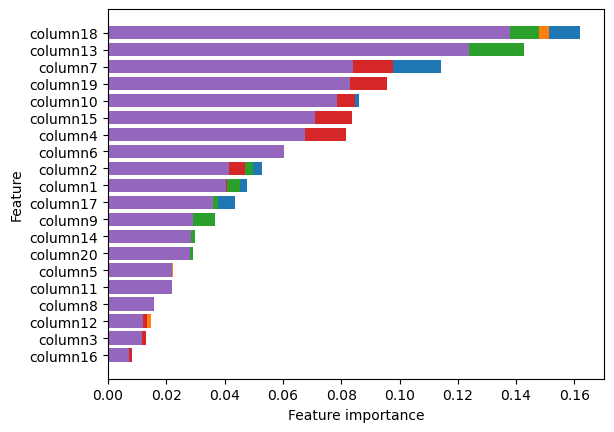

In [34]:
# cross validation
best_params = trial.params
best_params.update({
    'objective': 'multiclass',
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',
    'num_class': 3,
    'num_iteration': 3000,
    'verbosity': -1,
    'early_stopping_rounds': 100,
    'importance_type': 'gain',
    'seed': 42
})

# params in modified model
best_params_mm = trial.params.copy()
best_params_mm.update({
    'objective': 'multiclass',
    'metric': 'none',
    'boosting_type': 'gbdt',
    'num_class': 3,
    'num_iteration': 3000,
    'verbosity': -1,
    'early_stopping_rounds': 100,
    'seed': 42
})



# divide dataset
n_splits = 5
cv = list(StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 2022).split(x_gbm, y_gbm))

# CV loop
for nfold, (train_index, valid_index) in enumerate(cv):
    print("-"*20, nfold, "-"*20)
    x_tr, y_tr = x_gbm[train_index], y_gbm[train_index]
    x_va, y_va = x_gbm[valid_index], y_gbm[valid_index]
    print(x_tr.shape, y_tr.shape)
    print(x_va.shape, y_va.shape)
    
    # define lgb dataset
    lgb_train = lgb.Dataset(x_tr, label = y_tr)
    lgb_eval = lgb.Dataset(x_va, label = y_va, reference = lgb_train)
    
    print("\n")
    print("-"*20, "normal model learning", "-"*20, "\n")
    
    
    # model training
    evaluation_results={}
    model_DSM = lgb.train(best_params,
                      train_set=lgb_train,
                      valid_names=['train', 'valid'],
                      valid_sets=[lgb_train, lgb_eval],
                      evals_result=evaluation_results,
                      early_stopping_rounds = 100
                     )
    
    # calculate accuracy of test data
    y_pred_prob = model_DSM.predict(x_va, num_iteration = model_DSM.best_iteration)
    y_pred_lgb = np.argmax(y_pred_prob,axis=1)
    acc_lgb = accuracy_score(y_va, y_pred_lgb)
    print("-"*20, "Test data accuracy", "-"*20, "\n")
    print(acc_lgb)
    
    # gain features in normal LightGBM
    cols = list(df_20dims_patients.drop('patient number', axis = 1).columns)
    f_importance = np.array(model_DSM.feature_importance(importance_type='gain'))
    f_importance = f_importance / np.sum(f_importance)
    df_importance = pd.DataFrame({'feature':cols, 'importance':f_importance})
    df_importance = df_importance.sort_values('importance', ascending=False)
    print("-"*20, "gain importance in DSM", "-"*20, "\n")
    print(df_importance)
    
    # model training
    print("\n")
    print("-"*20, "DAM model learning", "-"*20, "\n")
    evaluation_results2={}
    my_mlnloss = MultiLoglossForLGBM(n_class = 3, use_softmax = True)
    model_myloss_DAM = lgb.train(best_params_mm,
                                train_set=lgb_train,
                                valid_names=['train', 'valid'],
                                valid_sets=[lgb_train, lgb_eval],
                                evals_result=evaluation_results2,
                                fobj=my_mlnloss.return_grad_and_hess,
                                feval=lambda preds, data: my_mlnloss.return_loss(preds, data),
                                early_stopping_rounds = 100
                               )
    
    # calculate accuracy of test data
    y_pred_prob_mm = model_myloss_DAM.predict(x_va, num_iteration = model_myloss_DAM.best_iteration)
    y_pred_lgb_mm = np.argmax(y_pred_prob_mm,axis=1)
    acc_lgb_mm = accuracy_score(y_va, y_pred_lgb_mm)
    print("-"*20, "Test data accuracy", "-"*20, "\n")
    print(acc_lgb_mm)
    
    print("-"*20, "gain importance in DSM", "-"*20, "\n")
    print(df_importance)
    
    # gain features in modified LightGBM
    cols = list(df_20dims_patients.drop('patient number', axis = 1).columns)
    f_importance_myloss = np.array(model_myloss_DAM.feature_importance(importance_type='gain'))
    f_importance_myloss = f_importance_myloss / np.sum(f_importance_myloss)
    df_importance_myloss = pd.DataFrame({'feature':cols, 'importance':f_importance_myloss})
    df_importance_myloss = df_importance_myloss.sort_values('importance', ascending=False)
    print(df_importance_myloss)
    print(plot_feature_importance(df_importance_myloss))
    
    # calculate differences between DSM(GC) and DAM(SFC)
    f_importance_ab = np.array(model_DSM.feature_importance(importance_type='gain'))
    f_importance_ab = f_importance_ab / np.sum(f_importance_ab)
    f_importance_myloss_ab = np.array(model_myloss_DAM.feature_importance(importance_type='gain'))
    f_importance_myloss_ab = f_importance_myloss_ab / np.sum(f_importance_myloss_ab)
    # after - before gain
    df_importance_subtracted = f_importance_myloss_ab - f_importance_ab
    df_importance_subtracted = df_importance_subtracted / np.sum(np.abs(df_importance_subtracted))
    df_importance_subtracted = pd.DataFrame({'feature':cols, 'importance':df_importance_subtracted})
    df_importance_subtracted = df_importance_subtracted.sort_values('importance', ascending=False)
    print("-"*20, "Difference of importance", "-"*20, "\n")
    
    print(df_importance_subtracted)